/home/larry/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


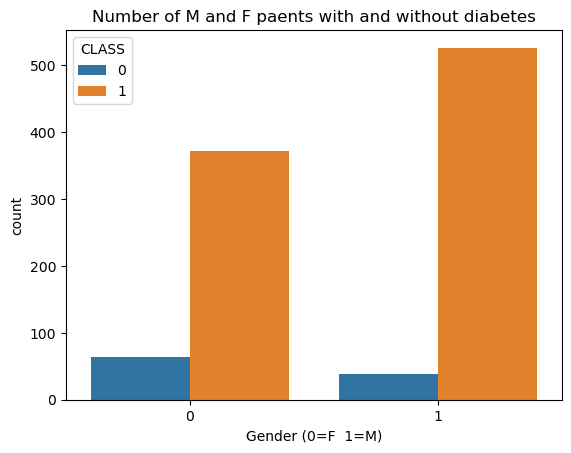

Number of male patients:  565
Number of male patients with diabetes:  526
Number of female patients:  435
Number of female patients with diabetes:  371


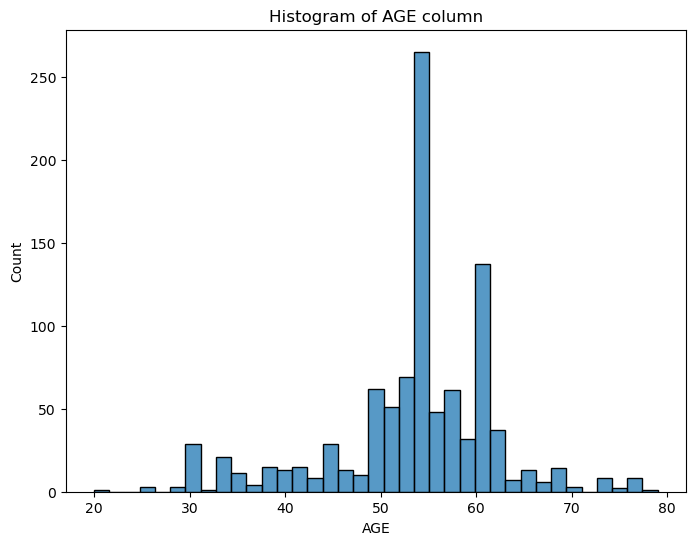

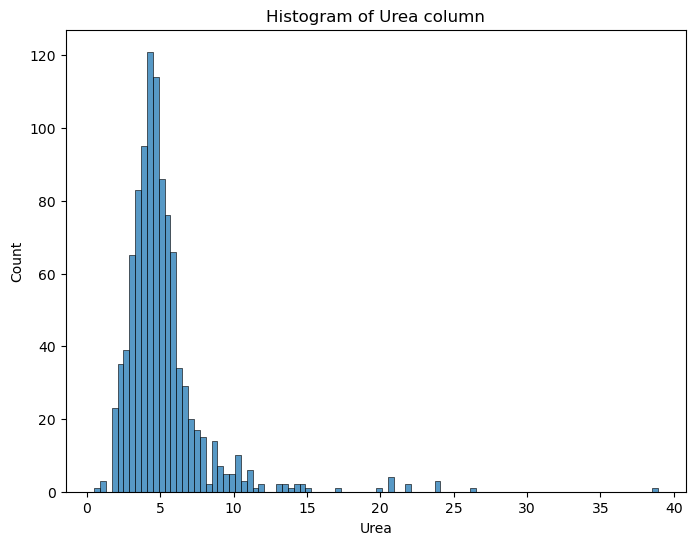

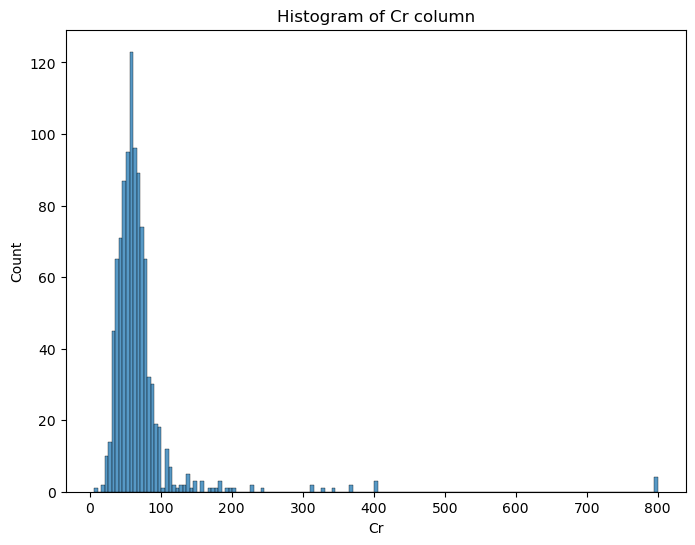

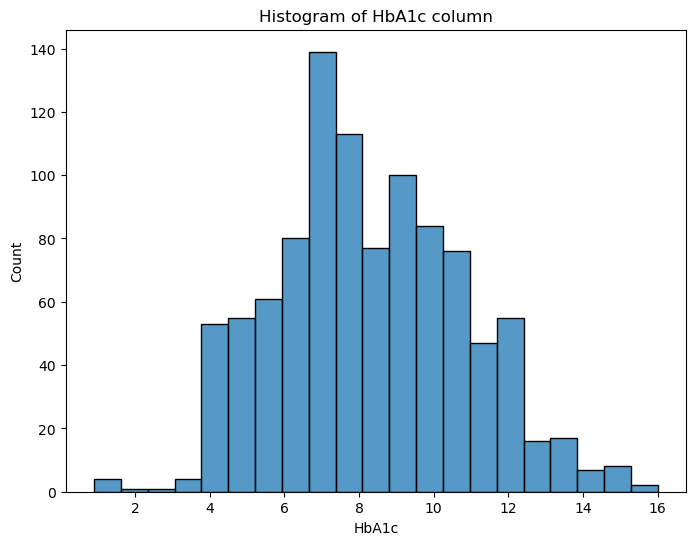

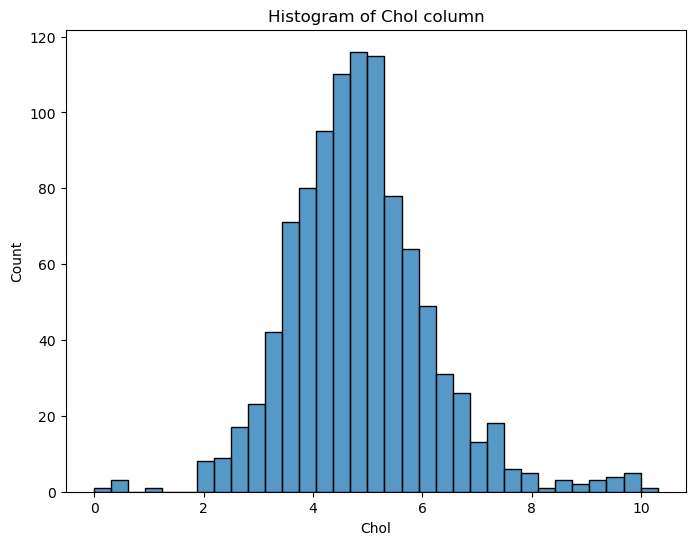

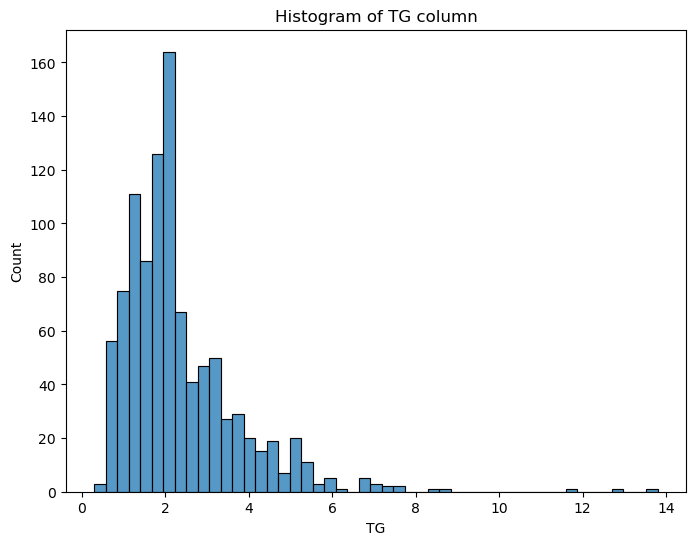

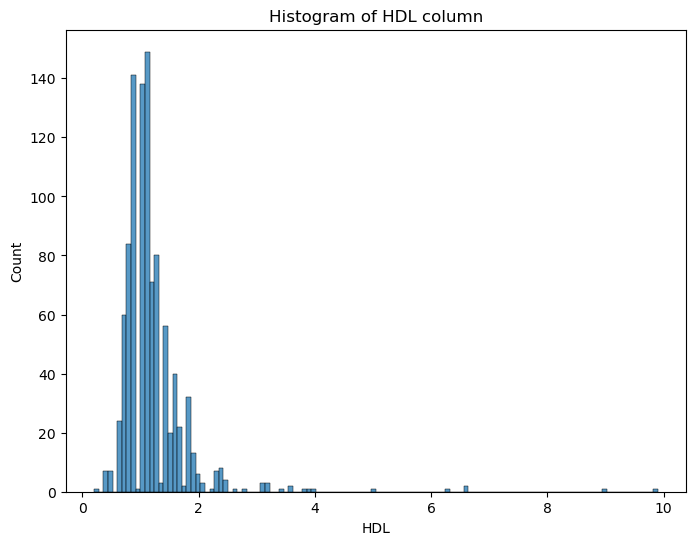

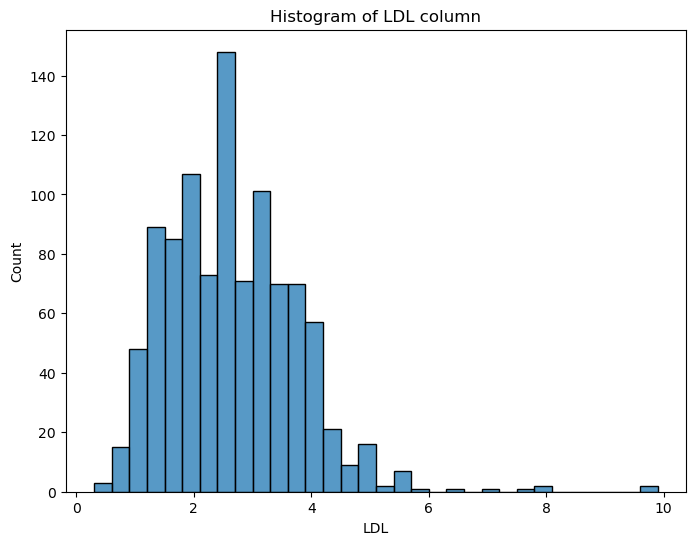

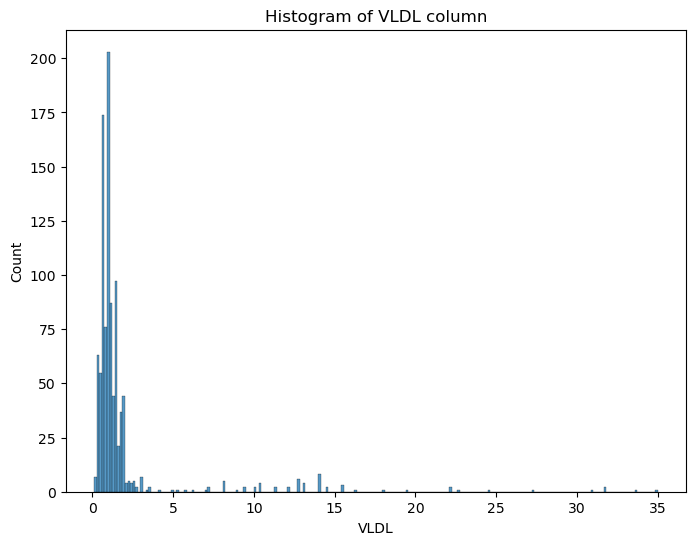

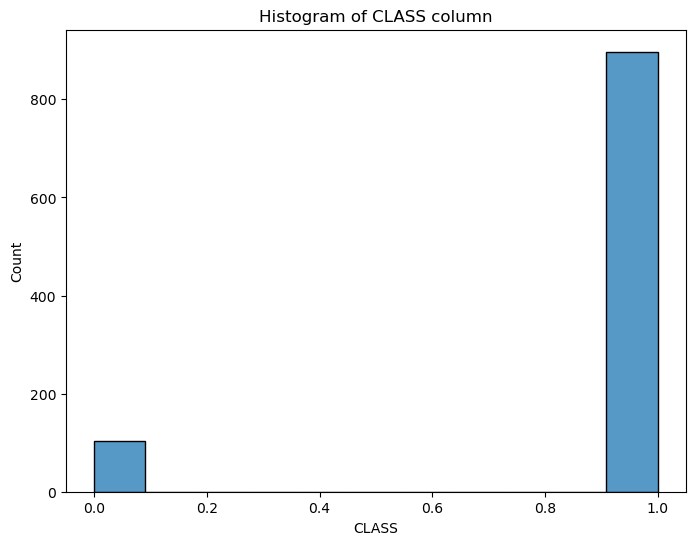

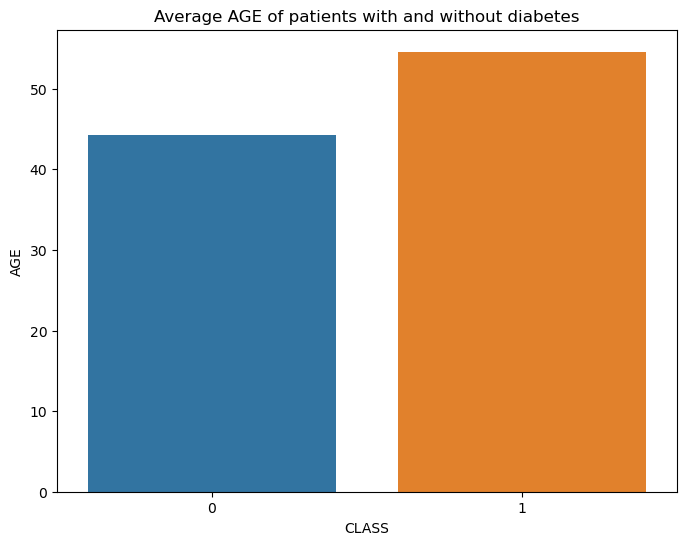

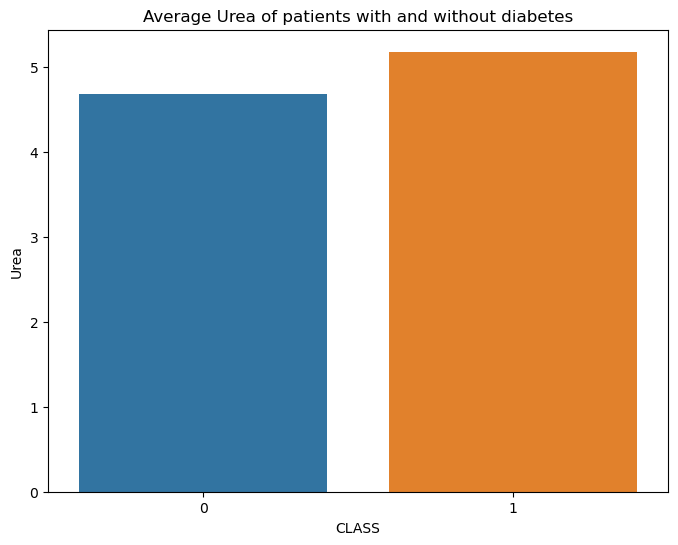

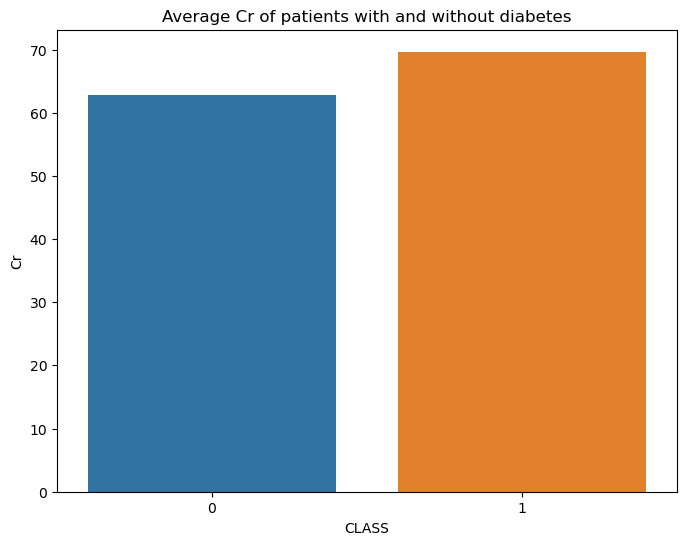

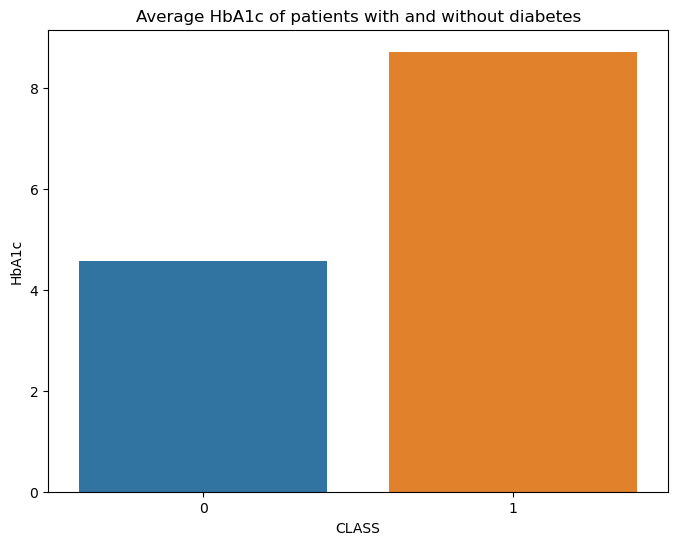

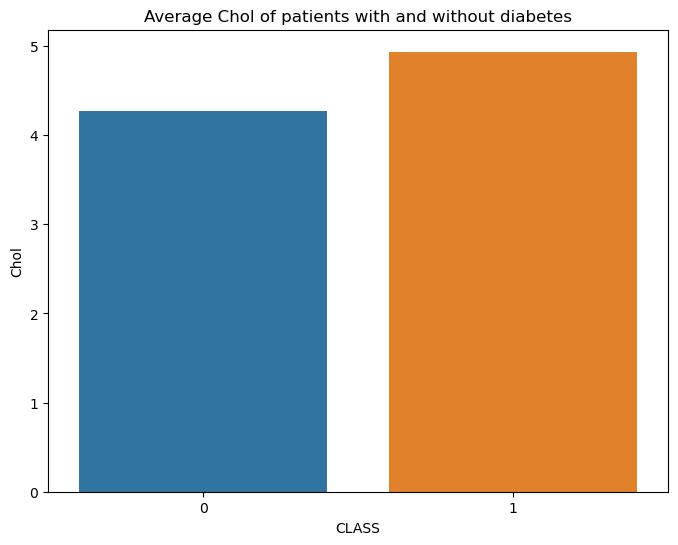

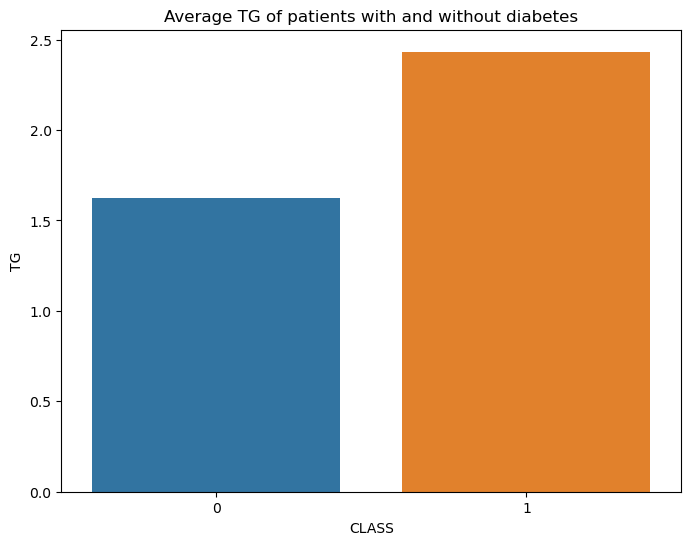

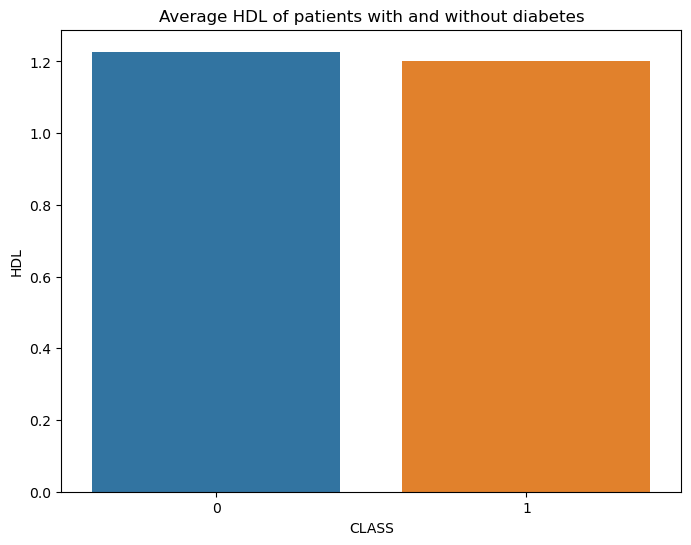

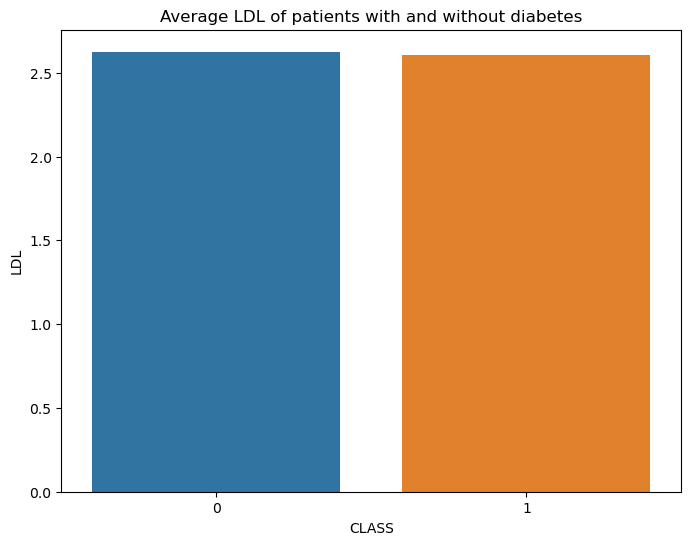

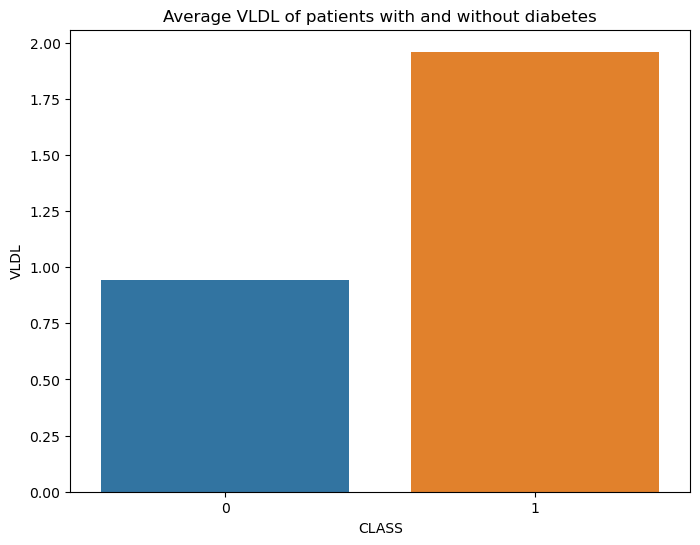

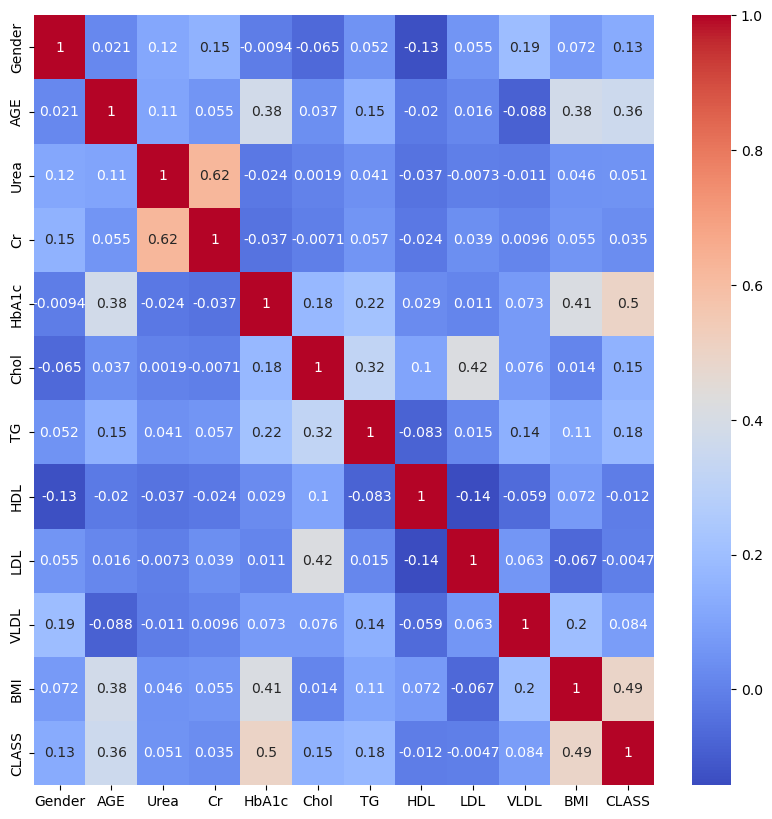

In [1]:
from tabnanny import verbose
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('~/workspace/datasets/diabetes_Mendeley_Data.csv')
df = data.copy()

# drop the 'ID' column
df = df.drop('ID', axis = 1)

# drop the 'No_Pation' column
df = df.drop('No_Pation', axis = 1)

# replace 'Male' with 1 and 'Female' with 0
df['Gender'] = df['Gender'].replace('M', 1)
df['Gender'] = df['Gender'].replace('F', 0)
df['Gender'] = df['Gender'].replace('f', 0)

# replace 'N' with 0 and 'Y' with 1
df['CLASS'] = df['CLASS'].replace('N', 0, regex=True)
df['CLASS'] = df['CLASS'].replace('Y', 1, regex=True)
df['CLASS'] = df['CLASS'].replace('P', 1, regex=True)

# plot the distribution of every symptom
sns.countplot(x=df.iloc[:, 0], hue=df['CLASS'])
plt.title('Number of M and F paents with and without diabetes')
plt.xlabel('Gender (0=F  1=M)')
plt.ylabel('count')
plt.show()

# print the number of 'M' and 'F' patients with and without diabetes
print('Number of male patients: ', len(df[df['Gender'] == 1]))
print('Number of male patients with diabetes: ', len(df[df['Gender'] == 1][df['CLASS'] == 1]))
print('Number of female patients: ', len(df[df['Gender'] == 0]))
print('Number of female patients with diabetes: ', len(df[df['Gender'] == 0][df['CLASS'] == 1]))

# making histograms of the following columns to see their distribution
num_col = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'CLASS']
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col])
    plt.title("Histogram of {} column".format(col))
    plt.show()

# making seaborn plot of the average symptoms of the following columns
num_col = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.barplot(x="CLASS",y=col,data=df,ci= False)
    plt.title("Average {} of patients with and without diabetes".format(col))
    plt.show()

# plot the correlation between the features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('~/workspace/datasets/diabetes_Mendeley_Data.csv')
df = data.copy()

# drop the 'ID' column
df = df.drop('ID', axis = 1)

# drop the 'No_Pation' column
df = df.drop('No_Pation', axis = 1)

# replace 'Male' with 1 and 'Female' with 0
df['Gender'] = df['Gender'].replace('M', 1)
df['Gender'] = df['Gender'].replace('F', 0)
df['Gender'] = df['Gender'].replace('f', 0)

# replace 'N' with 0 and 'Y' with 1
df['CLASS'] = df['CLASS'].replace('N', 0)
df['CLASS'] = df['CLASS'].replace('N ', 0)
df['CLASS'] = df['CLASS'].replace('Y', 1)
df['CLASS'] = df['CLASS'].replace('Y ', 1)
df['CLASS'] = df['CLASS'].replace('P', 1)

# split the data into features and target
X = df.drop('CLASS', axis = 1)
y = df['CLASS']

# use standard scaler to scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# convert the data to a dataframe
X = pd.DataFrame(X, columns = df.columns[:-1])

# summarize class distribution
counter = Counter(y)
print(counter)

# over-sampling using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

X.head()